# Logistic Regression from Scratch

## Overview
This script implements a custom logistic regression algorithm for binary classification 
of the breast cancer dataset. It demonstrates the core machine learning concepts 
of feature scaling, gradient descent, and model evaluation.

## Key Components
- Custom sigmoid activation function
- Manual gradient descent implementation
- Loss and cost calculation
- Preprocessing and feature scaling

In [35]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from scipy import stats
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt 
import math

In [2]:
data = load_breast_cancer()

In [3]:
bc = pd.DataFrame(data.data,columns=data.feature_names)
type = pd.Series(data.target)
bc

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


## Sigmoid Activation Function

Implements the sigmoid (logistic) activation function, transforming linear input to a probability between 0 and 1.

---
Mathematical Formulao
$$
\sigma(z) = \frac{1} {1 + e^{-z}}
$$
-z}}
\]

---

### Parameters

- **`z` (numpy.ndarray)**: Linear combination of features and weights

---

### Returns

- Transformed probability values between 0 and 1

---

### Key Characteristics

- Squashes input to the range \([0, 1]\)
- Used in logistic regression for binary classification
- Provides a probabilistic interpretation of the linear model
n of linear model

applying logistic regression to this dataset

In [4]:
def sigmoid(z):
    return (1/(1+np.exp(-z)))

## Prediction Function

Generates binary predictions based on learned weights and a decision threshold.

---

### Prediction Process
1. Compute the linear combination of features using the dot product.
2. Apply an activation function and a threshold to determine the class.

---

### Parameters
- **`x` (numpy.ndarray)**: Input feature matrix
- **`g` (callable)**: Activation function (e.g., sigmoid)
- **`w` (numpy.ndarray)**: Weight vector
- **`b` (float)**: Bias term
- **`thres` (float)**: Decision threshold

---

### Returns
- Binary predictions (0 or 1)

---

### Notes
- Uses the dot product for the linear combination.
- The threshold determines the class boundary.


In [26]:
def preds(x,g,w,b,thres):
    m=x.shape[0]
    preds=np.zeros((m,))
    for i in range(m):
        f=np.dot(x[i],w)+b
        if f>=thres:
            preds[i] = 1
        else:
            preds[i] = 0
    return preds

## Binary Cross-Entropy Loss Calculation

Computes individual sample loss using binary cross-entropy.

---

### Mathematical Formula

$$
-{(y\log(p) + (1 - y)\log(1 - p))}
$$

---

### Parameters
- **`x` (numpy.ndarray)**: Single feature vector  
- **`y` (float)**: True label  
- **`g` (callable)**: Activation function  
- **`w` (numpy.ndarray)**: Weight vector  
- **`b` (float)**: Bias term  

---

### Returns
- Loss value for a single sample




In [6]:
def loss(x, y, g, w, b):
    z = np.dot(x, w) + b
    f = g(z)
    # Clip values to avoid log(0)
    f = np.clip(f, 1e-15, 1 - 1e-15)
    return -y * np.log(f) - (1 - y) * np.log(1 - f)

In [7]:
def cost(x,y,w,b,g,loss=loss):
    m= x.shape[0]
    cost=0.0
    for i in range(m):
        cost+=loss(x[i],y[i],g,w,b)
    return (cost/m)

In [8]:
def gradients(x,y,w,b,g):
    m,n=x.shape
    dj_dw = np.zeros((n,))
    dj_db = 0
    for i in range(m):
        err = (g(np.dot(x[i],w)+b))-y[i]
        for j in range(n):
            dj_dw[j]+=err*x[i,j]
        dj_db+=err
    return (dj_dw/m),(dj_db/m)

## Gradient Descent Optimization

Performs iterative model parameter optimization.

---

### Optimization Process

1. Initialize parameters  
2. Compute gradients  
3. Update weights and bias  
4. Track cost history
history


In [9]:
def gradient_descent(x,y,w,b,g,num_iters,alpha,cost,loss,gradients):
    J_history =[]
    print(f"Cost {cost(x,y,w,b,g):8.2f}   ")

    for i in range(num_iters):
        dj_dw,dj_db = gradients(x,y,w,b,g)

        w-=alpha*dj_dw
        b-=alpha*dj_db

        J_history.append(cost(x,y,w,b,g))

        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]}   ")

    return w,b

In [10]:
mask = (np.abs(stats.zscore(bc)) < 3).all(axis=1)
bc = bc[mask]
type = type[mask]

In [11]:
b = 0
w = np.random.rand(30)

In [12]:
X_train,X_test,y_train,y_test = train_test_split(
    bc,type, test_size=0.27, random_state=42)

In [13]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [25]:
cost(X_train,y_train.to_numpy(),w,b,sigmoid,loss)

0.05724907587077315

In [27]:
w,b = gradient_descent(X_train,y_train.to_numpy(),w,b,sigmoid,1000,10,cost,loss,gradients)

Cost     0.06   
Iteration    0: Cost 0.042149028719643065   
Iteration  100: Cost 0.014290329047832555   
Iteration  200: Cost 0.013603893671558561   
Iteration  300: Cost 0.013011143917175838   
Iteration  400: Cost 0.01247294648714486   
Iteration  500: Cost 0.011979224686334411   
Iteration  600: Cost 0.011523773113333781   
Iteration  700: Cost 0.01110191803185183   
Iteration  800: Cost 0.01070987372603461   
Iteration  900: Cost 0.010344470734036052   


In [42]:
X_test= scaler.fit_transform(X_test)

In [44]:
pred = preds(X_test,sigmoid,w,b,0.5)

In [33]:
pred[150]

1.0

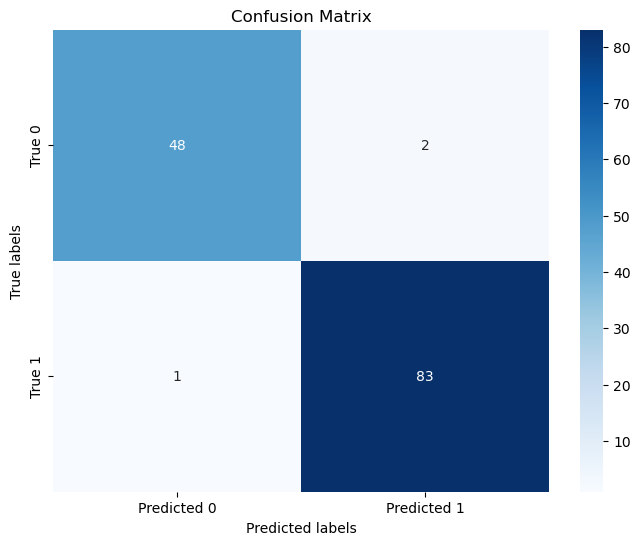

In [45]:
cm = confusion_matrix(y_test.to_numpy(), pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['True 0', 'True 1'])
plt.ylabel('True labels')
plt.xlabel('Predicted labels')
plt.title('Confusion Matrix')
plt.show()